In [1]:
import sys
sys.path.append('../../')

In [2]:
from scripts.utils import data_path, set_mpl, read_trentino, add_datetime_features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import geopandas as gpd
import contextily as ctx

%matplotlib widget

set_mpl()

matplotlib settings set
matplotlib settings set


In [3]:
telecom,energy,lines = read_trentino()


    Loading Trentino data from /Users/sdbykov/not_work/swarm_energAIser/0_data/.

    Data (energy and telecommunication) are spatially-resolved in grid cells. 
    For the location of grid cells see geojson file in the same folder (trentino-grid.geojson), e.g. plot it on the website https://geojson.io/.

    
    Telecommunication Data (sms, calls, internet)  is not resampled, energy consumption data is resampled to 1H resolution.
    Telecommunication data are only for grid cells with energy consumption data.
    Telecommunication data is for country-code 39 (Italy) only.

    reutrns:
    df_telecom: pd.DataFrame with telecom data (sms, calls, internet)  with arbitrary scale for a given cell and datetime.
    df_line_energy: pd.DataFrame with line energy consumption data. Index - datetime, columns - consumption for each line ID.
    df_line_location: pd.DataFrame with line ID location (cell). Index - cell ID, LINESET - line ID, NR_UBICAZIONI - number of customers on the line
    



In [6]:
telecom

,CellID,smsin,smsout,callin,callout,internet
datetime,,,,,,
2013-11-01 00:00:00,3912,3.249878,0.704331,1.538997,2.207049,36.130143
2013-11-01 00:00:00,6417,0.092173,NaN,NaN,NaN,5.668717
2013-11-01 00:00:00,4622,0.715891,0.509771,0.213042,0.105133,10.908941
2013-11-01 00:00:00,3333,0.856228,0.832248,0.000681,0.003347,19.581191
2013-11-01 00:00:00,8473,0.391456,0.448718,0.037145,0.043906,7.619412
...,...,...,...,...,...,...
2014-01-01 23:50:00,1339,0.264101,0.264101,NaN,NaN,7.353272
2014-01-01 23:50:00,5339,0.086688,0.137298,0.096806,NaN,6.920185
2014-01-01 23:50:00,5906,0.416680,0.345276,NaN,0.036613,11.525493


In [9]:
lines.query("LINESET=='DG1012424'")

,LINESET,NR_UBICAZIONI
SQUAREID,,
2959,DG1012424,41
3075,DG1012424,21
3076,DG1012424,369
3077,DG1012424,54
3192,DG1012424,7
3193,DG1012424,310
3194,DG1012424,659
3195,DG1012424,1


In [5]:
lines.query("index==3192")

,LINESET,NR_UBICAZIONI
SQUAREID,,
3192,DG1012424,7
3192,DG1012425,524


<AxesSubplot: xlabel='datetime'>

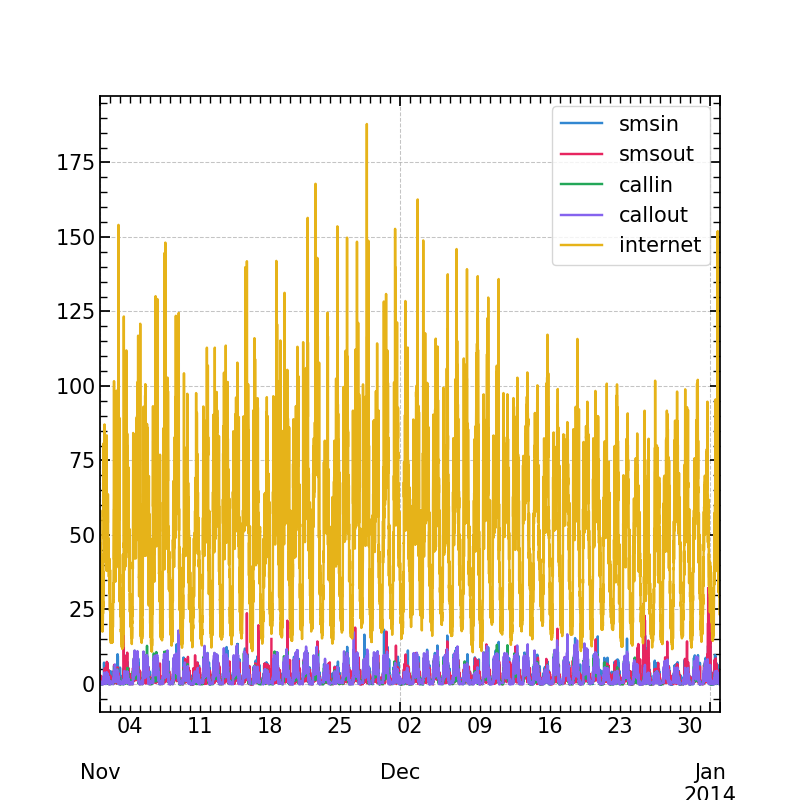

In [42]:
telecom.query('CellID==5324').drop('CellID', axis = 1).plot()

In [43]:
lines.query("index == 5201")

,LINESET,NR_UBICAZIONI
SQUAREID,,
5201,DG1002525,43
5201,DG1002529,19
5201,DG1002533,233
5201,DG1002534,455
5201,DG1002535,288
5201,DG1011920,60
5201,DG1011926,190


<AxesSubplot: xlabel='date'>

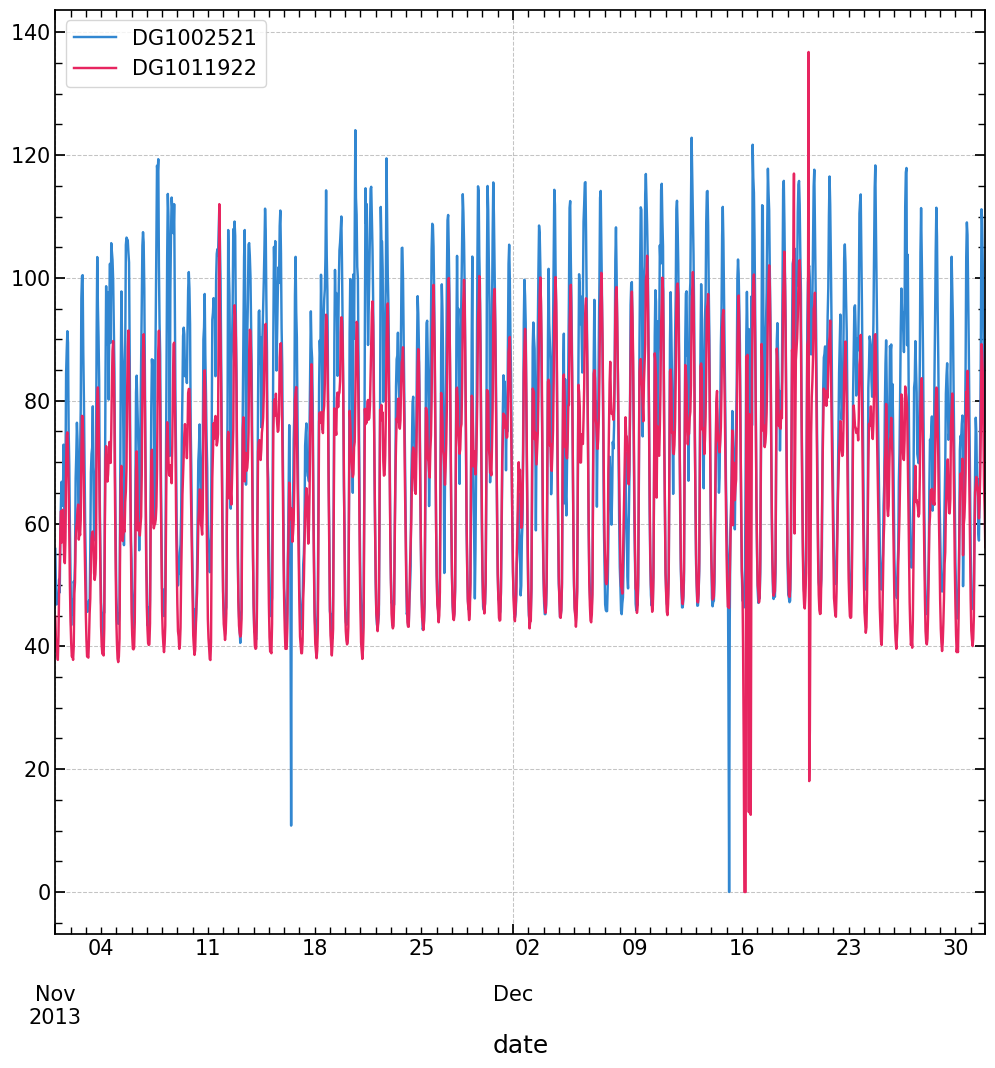

In [32]:
fig,  ax =  plt.subplots( figsize = (12,12))
energy[['DG1002521']].plot(ax = ax)
energy[['DG1011922']].plot(ax =ax)

In [26]:
energy.head(10)

,DG1000420,DG1000421,DG1000422,DG1000423,DG1000425,DG1000620,DG1000621,DG1000622,DG1000624,DG1000625,DG1000820,DG1000821,DG1000823,DG1000824,DG1000825,DG1001120,DG1001121,DG1001123,DG1001124,DG1001125,DG1001126,DG1001127,DG1001320,DG1001321,DG1001322,DG1001323,DG1001324,DG1002020,DG1002021,DG1002022,DG1002023,DG1002024,DG1002025,DG1002026,DG1002120,DG1002121,DG1002122,DG1002124,DG1002125,DG1002126,DG1002128,DG1002520,DG1002521,DG1002522,DG1002525,DG1002527,DG1002528,DG1002529,DG1002531,DG1002532,DG1002533,DG1002534,DG1002535,DG1002536,DG1002537,DG1002538,DG1002539,DG1003101,DG1003103,DG1003116,DG1003117,DG1003119,DG1003301,DG1003302,DG1003315,DG1003316,DG1003317,DG1003318,DG1010901,DG1010902,DG1010903,DG1011520,DG1011521,DG1011522,DG1011523,DG1011524,DG1011620,DG1011621,DG1011622,DG1011623,DG1011624,DG1011625,DG1011626,DG1011627,DG1011629,DG1011920,DG1011921,DG1011922,DG1011923,DG1011924,DG1011925,DG1011926,DG1011927,DG1011928,DG1011930,DG1011931,DG1012220,DG1012221,DG1012223,DG1012320,DG1012321,DG1012327,DG1012420,DG1012421,DG1012423,DG1012424,DG1012425,DG1012426,DG1012427,DG1012430,DG1012720,DG1012721,DG1012722,DG1012723,DG1012724,DG1012821,DG1012822,DG1012823,DG1012901,DG1012902,DG1012905,DG1012907,DG1012908,DG1012915,DG1012917,DG1012921,DG1012922,DG1012923,DG1012928,DG1012929,DG1013001,DG1013002,DG1013004,DG1013007,DG1013015,DG1013016,DG1013017,DG1013023,DG1013220,DG1013221,DG1013222,DG1013223,DG1013320,DG1013321,DG1013322,DG1013323,DG1013325,DG1013503,DG1013504,DG1013505,DG1013701,DG1013702,DG1013703,DG1013704,DG1013707,DG1013708,DG1022120,DG1022121,DG1022123,DG1022124,DG1022125,DG1022320,DG1022321,DG1022322,DG1022323,DG1026020,DG1026021,DG1026022,DG1026023,DG1026024,DG1026025,DG1026026,DG1026027,DG1026028,DG1026029,DG1026030,DG1031220,DG1031221,DG1056620,DG1056621,DG1056623,DG1056624,DG1056625,DG1056626
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-11-01 00:00:00,35.939999,20.61,13.679999,14.669999,16.349999,19.680000,12.389999,19.050000,40.859998,24.599999,16.289999,25.679999,13.679999,0.0,13.800000,7.225000,-21.979167,0.0,14.191667,85.154167,4.500000,36.279167,-38.562500,13.291667,31.762501,8.683333,16.845833,-15.187500,6.433333,34.541666,18.729167,14.229167,32.008333,12.662500,58.212499,54.395833,-33.237499,45.562500,90.629165,40.545834,46.187500,29.187500,55.866667,35.358333,32.958334,4.1,41.304168,37.320833,30.654166,34.225000,32.016667,47.416666,26.687500,39.799999,64.533334,1.483333,29.933333,22.019999,5.76,27.539999,42.599998,0.90,74.129997,13.679999,16.559999,0.0,23.759998,24.570000,13.409999,17.729999,19.619999,26.170833,24.529166,27.745833,15.975000,47.862500,40.887501,34.054166,18.262500,34.904167,7.870833,68.604167,44.145832,24.658333,0.0,33.629998,76.949996,44.819998,53.039998,40.529998,34.409999,17.189999,24.479999,10.17,53.459999,52.469997,8.862500,10.737500,0.0,10.450000,6.491667,0.029167,19.145833,19.608334,21.312500,68.829166,28.970833,127.766665,37.075000,91.495835,-25.704167,15.795833,30.391666,31.483334,-78.125000,21.416666,11.545833,0.0,59.395834,74.050001,15.641667,26.275000,21.329166,13.154167,49.991667,34.420835,19.975000,31.387500,7.008333,11.050000,18.975001,24.300001,28.800001,0.00,9.900001,36.000000,10.850000,30.675001,12.266667,25.629167,5.762500,29.587500,7.65,5.76,6.48,0.0,10.439999,11.358333,14.554167,38.420832,31.960000,6.96,22.439999,7.860000,15.460000,0.0,38.666667,16.437500,-81.029167,0.0,0.0,35.337500,-67.220833,31.312500,0.0,26.616667,26.370833,53.041666,59.899999,19.866667,36.166667,18.012500,7.666667,36.416668,22.841666,27.770833,22.520000,31.239999,31.562500,10.525000,4.837500,15.562500,19.008333,37.470833
2013-11-01 01:00:00,33.779998,20.16,15.119999,13.799999,16.349999,17.339999,12.209999,16.859999,38.879998,22.499999,16.559999,25.109999,13.679999,0.0,14.310000,7.408333,-22.950000,0.0,13.891667,87.762499,4.500000,36.525000,-39.0583

# plot grid

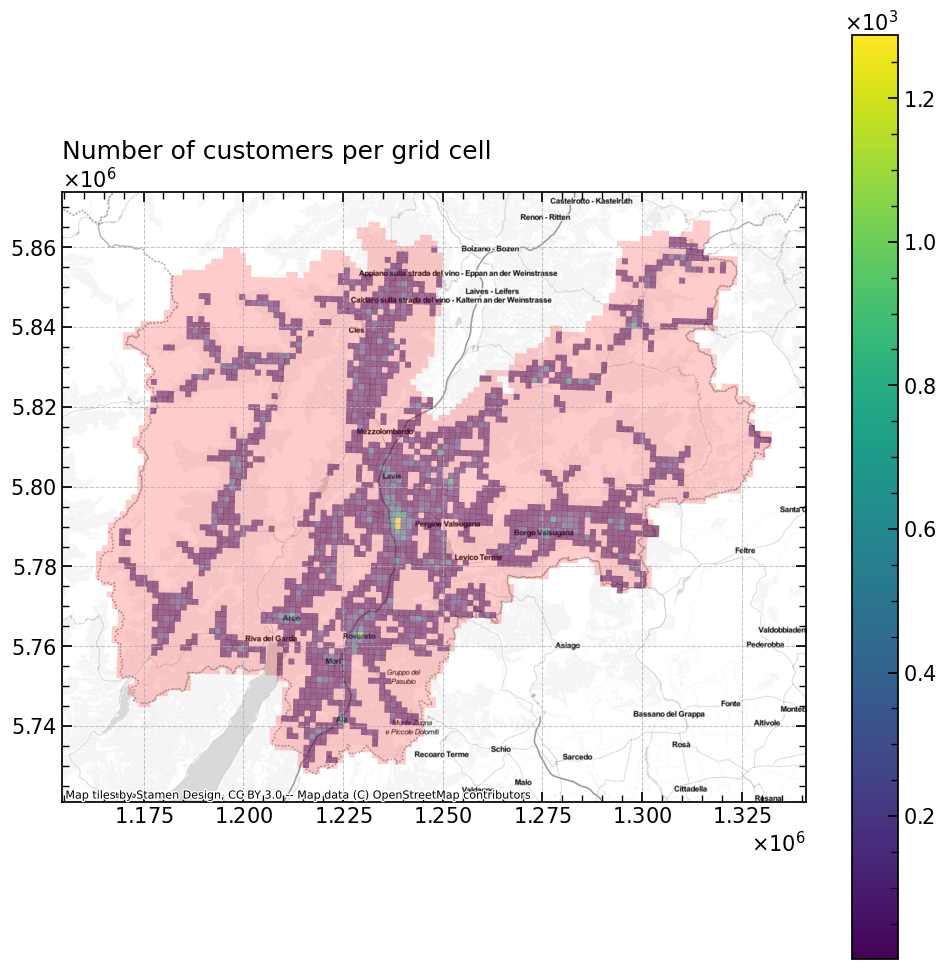

In [4]:

#see also web browser viewer of geojson files: https://geojson.io/
gridfile = data_path+'Trentino_drive/trentino-grid.geojson'
grid = gpd.read_file(gridfile)
grid = grid.to_crs(epsg=3857)


grid['NR_UBICAZIONI'] = grid['cellId'].map(lines.reset_index(drop = False, inplace = False).groupby('SQUAREID')['NR_UBICAZIONI'].sum())

fig,  ax =  plt.subplots( figsize = (12,12))
grid.plot(ax = ax, color = 'r', alpha = 0.2)
grid.plot(ax = ax, column = 'NR_UBICAZIONI', legend = True, alpha = 0.5, cmap = 'viridis', edgecolor = 'k', linewidth = 0.1)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)


ax.set_title('Number of customers per grid cell')
plt.show()


# Explore the data

In [5]:
example_cellID = 4424
LINESET = ['DG1000821']
display(lines.loc[example_cellID])


energy_cell = energy[LINESET]
telecom_cell = telecom.query('CellID == @example_cellID') 

LINESET          DG1000821
NR_UBICAZIONI          187
Name: 4424, dtype: object

<AxesSubplot: xlabel='date'>

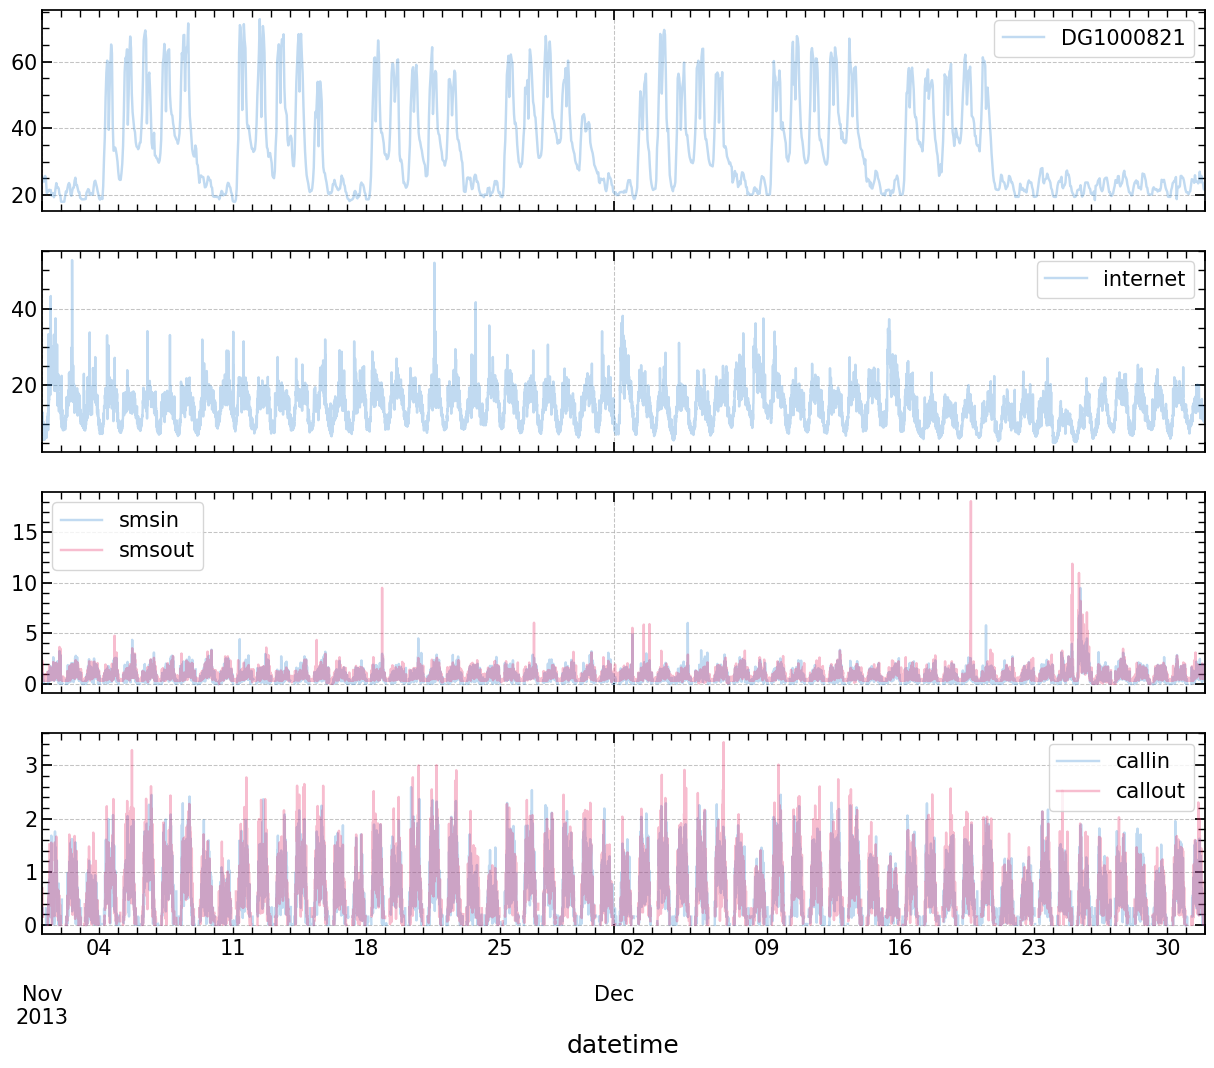

In [6]:
fig,  axs =  plt.subplots(4,  figsize = (15,12), sharex = True)
axs = axs.flatten()

telecom_cell[['internet']].plot(ax = axs[1],  alpha = 0.3)
telecom_cell[['smsin',	'smsout']].plot(ax = axs[2],  alpha = 0.3)
telecom_cell[['callin',	'callout']].plot(ax = axs[3],  alpha = 0.3)
energy_cell.plot(ax = axs[0],  alpha = 0.3)